# Curvas de Nível e Campo de Gradientes de uma Função Bidimensional

Neste notebook é apresentada a análise de uma função escalar de duas variáveis por meio de cálculo simbólico e visualização gráfica.  
As derivadas parciais são obtidas automaticamente com o SymPy, convertidas para funções numéricas e utilizadas para construir as curvas de nível e o campo de gradientes da função no plano.

### Importanção das Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Definindo a função e calculando as derivadas

In [2]:
x, y = sp.symbols('x y')

# Função Editável
f_sym = sp.sin(x*y) + sp.exp(x) * sp.cos(y) - x**2 * y

dfdx_sym = sp.diff(f_sym, x)
dfdy_sym = sp.diff(f_sym, y)

print("∂f/∂x =", dfdx_sym)
print("∂f/∂y =", dfdy_sym)


∂f/∂x = -2*x*y + y*cos(x*y) + exp(x)*cos(y)
∂f/∂y = -x**2 + x*cos(x*y) - exp(x)*sin(y)


### Conversão para Numpy e definindo malhas e domínios

In [3]:
f_num = sp.lambdify((x, y), f_sym, 'numpy')
dfdx_num = sp.lambdify((x, y), dfdx_sym, 'numpy')
dfdy_num = sp.lambdify((x, y), dfdy_sym, 'numpy')

# Manipulação de Domínio
x_vals = np.linspace(-2, 2, 256)
y_vals = np.linspace(-2, 2, 256)
X, Y = np.meshgrid(x_vals, y_vals)

xg = np.linspace(-2, 2, 15)
yg = np.linspace(-2, 2, 15)
Xg, Yg = np.meshgrid(xg, yg)

U = dfdx_num(Xg, Yg)
V = dfdy_num(Xg, Yg)

### Plot do Gráfico

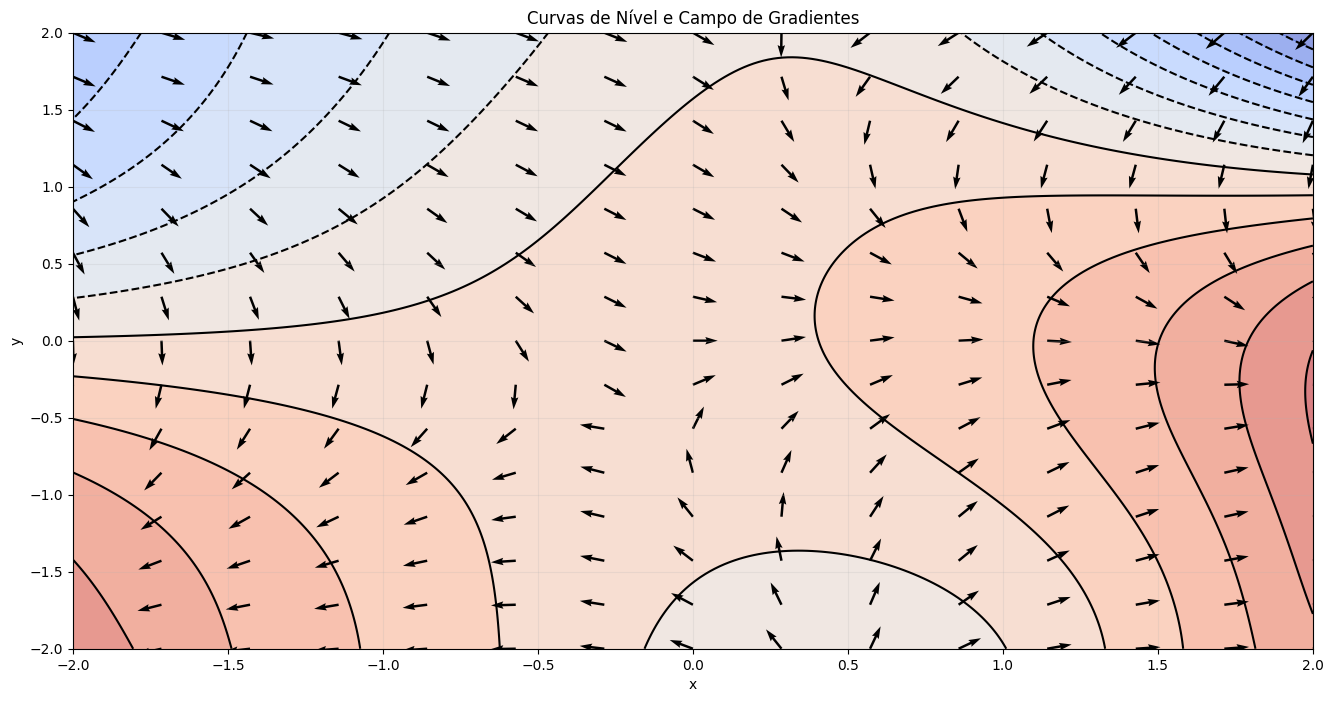

In [4]:
plt.figure(figsize=(16, 8))

plt.contour(X, Y, f_num(X, Y), levels=15, colors='black')           
plt.contourf(X, Y, f_num(X, Y), levels=15, cmap='coolwarm', alpha=0.6)

# Normalização do gradiente
mag = np.sqrt(U**2 + V**2)
U_norm = U / mag
V_norm = V / mag

plt.quiver(Xg, Yg, U_norm, V_norm, color='black', width=0.002, scale=50)

plt.title("Curvas de Nível e Campo de Gradientes")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.2)